<a href="https://colab.research.google.com/github/seongwoojang1123/TMJ-osteoarthritis-diagnosis-/blob/main/2_data_initial_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file_path = '/content/drive/MyDrive/TMJ OA/241023_TMJ OA data.csv'

df = pd.read_csv(file_path)

columns = df.columns

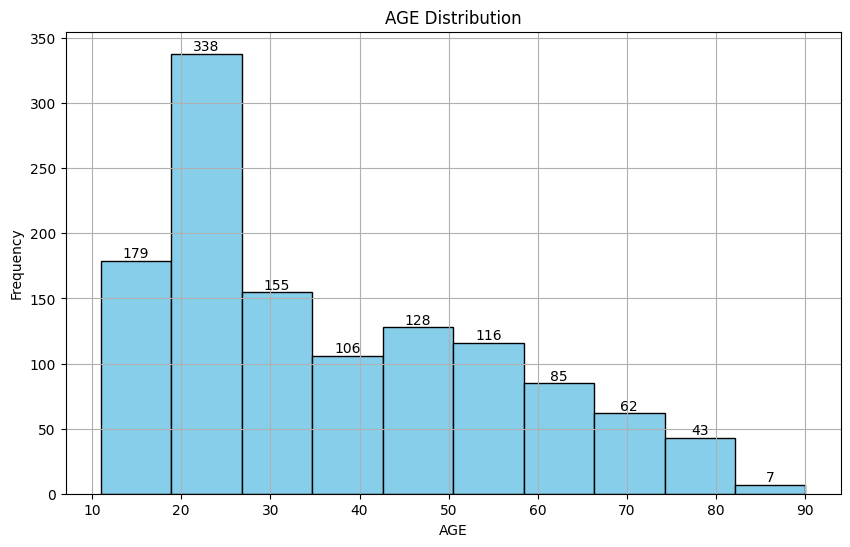

In [10]:
# 나이 분포를 히스토그램으로 시각화

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['AGE'], bins=10, color='skyblue', edgecolor='black')

# 막대 위에 빈도 수치 표시
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count,    # 막대의 중앙에 텍스트 배치
             f'{int(count)}', ha='center', va='bottom', fontsize=10)  # 수치를 정수로 표시

plt.title('AGE Distribution')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

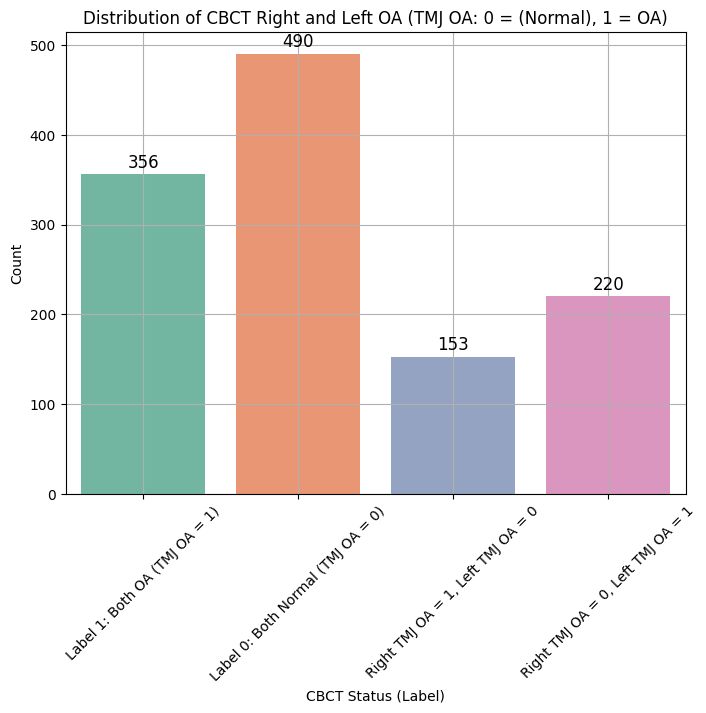

In [12]:
# 새로운 상태 열 생성 (Label 개념 포함)
df['CBCT_Label'] = 'None'  # 기본 값 설정

# 1. 양쪽 모두 정상인 경우 (TMJ OA = 0, Normal)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0), 'CBCT_Label'] = 'Label 0: Both Normal (TMJ OA = 0)'

# 2. 양쪽 모두 OA인 경우 (TMJ OA = 1, 양성)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1), 'CBCT_Label'] = 'Label 1: Both OA (TMJ OA = 1)'

# 3. 한쪽만 OA (Right Normal, Left OA)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1), 'CBCT_Label'] = 'Right TMJ OA = 0, Left TMJ OA = 1'

# 4. 한쪽만 OA (Right OA, Left Normal)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0), 'CBCT_Label'] = 'Right TMJ OA = 1, Left TMJ OA = 0'

# CBCT Label별 분포 시각화
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CBCT_Label', data=df, palette='Set2', hue='CBCT_Label', dodge=False, legend=False)

# 막대 위에 숫자(빈도 수) 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# 그래프 제목 및 축 레이블 설정 (Label 개념 포함)
plt.title('Distribution of CBCT Right and Left OA (TMJ OA: 0 = (Normal), 1 = OA)')
plt.xlabel('CBCT Status (Label)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # X축 레이블이 잘 보이도록 45도 회전
plt.grid(True)

# 그래프 출력
plt.show()

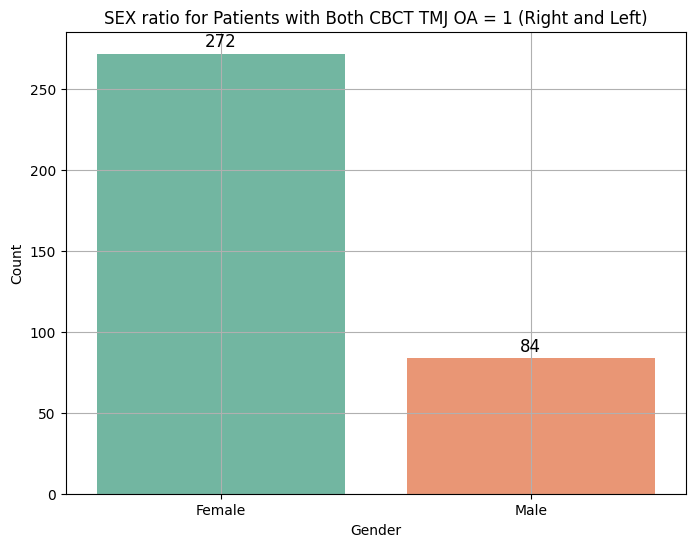

In [16]:
# CBCT_Rt OA와 CBCT_Lt OA가 모두 OA(1)인 경우만 필터링
both_oa_df = df[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
                (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1)].copy()

# 성별을 문자열로 변환한 후 매핑
both_oa_df['SEX'] = both_oa_df['SEX'].astype(int).map({0: 'Female', 1: 'Male'})

# 성별에 따른 CBCT OA 여부 시각화 (카운트 플롯)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SEX', data=both_oa_df, hue='SEX', palette='Set2', dodge=False)

# 막대 위에 숫자(빈도 수) 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('SEX ratio for Patients with Both CBCT TMJ OA = 1 (Right and Left)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)

# 그래프 출력
plt.show()

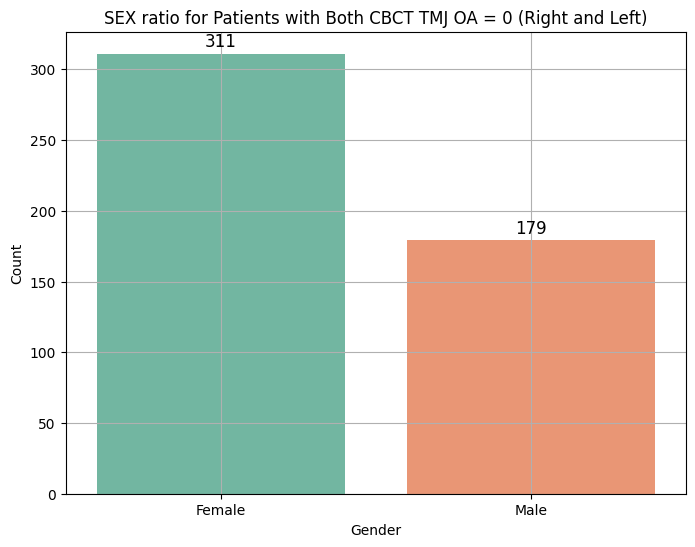

In [24]:
# 성별에 따른 CBCT OA 여부 시각화 (카운트 플롯)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SEX', data=both_oa_df, palette='Set2', hue='SEX', dodge=False, legend=False)

# 막대 위에 숫자(빈도 수) 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('SEX ratio for Patients with Both CBCT TMJ OA = 0 (Right and Left)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)

# 그래프 출력
plt.show()

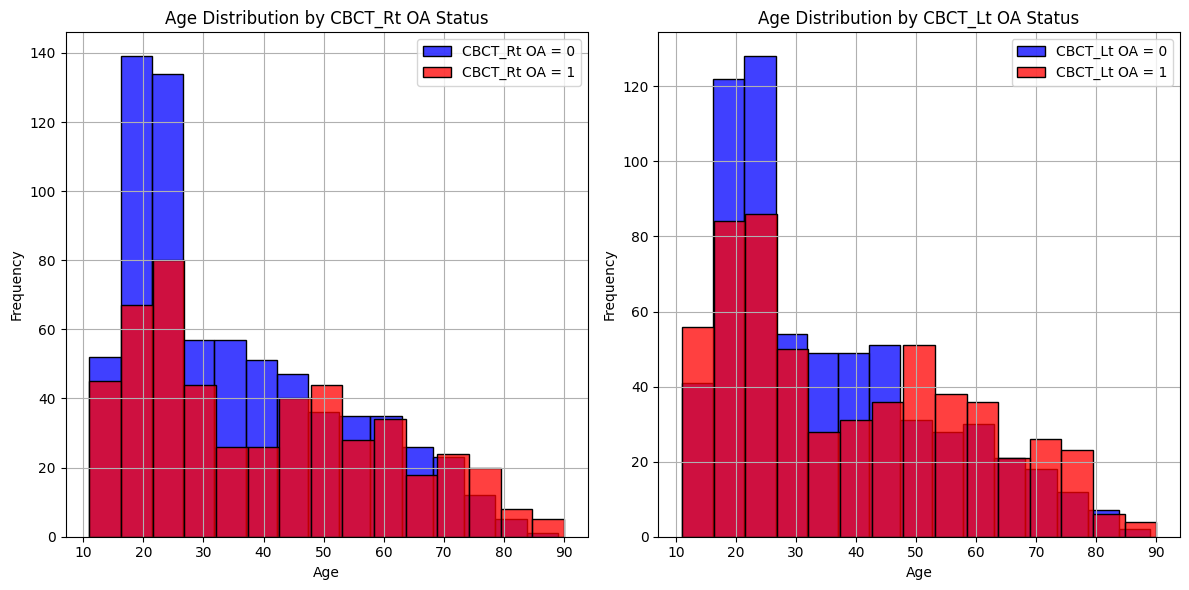

In [25]:
# 서브플롯을 사용하여 CBCT_Rt OA와 CBCT_Lt OA 상태에 따른 나이 분포 비교
plt.figure(figsize=(12, 6))

# CBCT_Rt OA 상태에 따른 나이 분포 (히스토그램)
plt.subplot(1, 2, 1)
sns.histplot(df[df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0]['AGE'], color='blue', label='CBCT_Rt OA = 0', bins=15)
sns.histplot(df[df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1]['AGE'], color='red', label='CBCT_Rt OA = 1', bins=15)
plt.title('Age Distribution by CBCT_Rt OA Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# CBCT_Lt OA 상태에 따른 나이 분포 (히스토그램)
plt.subplot(1, 2, 2)
sns.histplot(df[df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0]['AGE'], color='blue', label='CBCT_Lt OA = 0', bins=15)
sns.histplot(df[df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1]['AGE'], color='red', label='CBCT_Lt OA = 1', bins=15)
plt.title('Age Distribution by CBCT_Lt OA Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


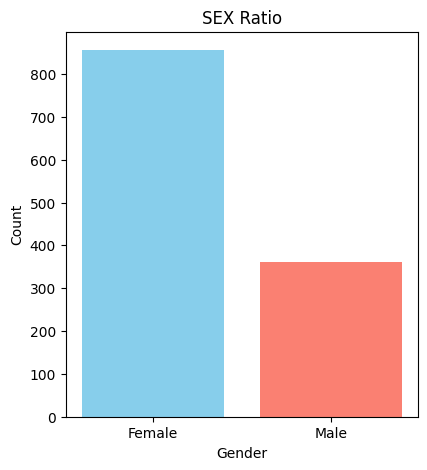

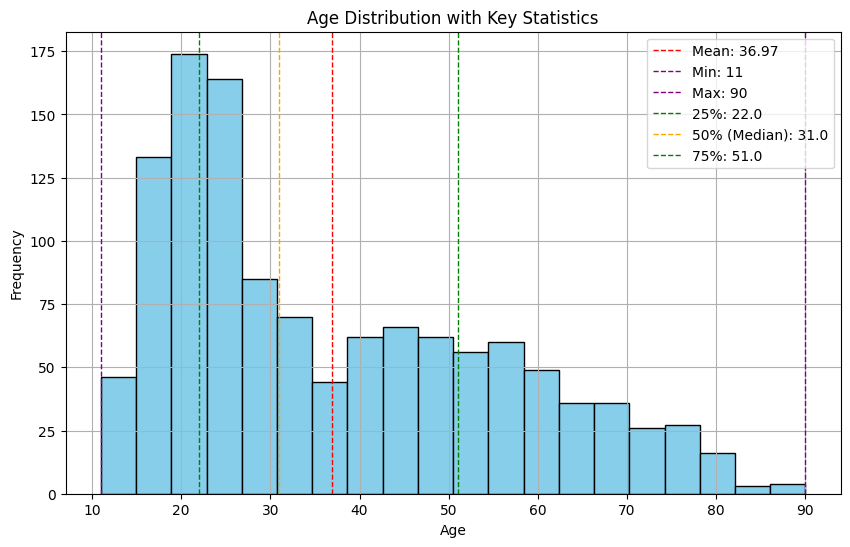

In [26]:
# 성별 분포 및 나이 분포 확인
sex_distribution = df['SEX'].value_counts()
age_distribution = df['AGE'].describe()

# 시각화
plt.figure(figsize=(10, 5))

# 성별 분포 그래프
plt.subplot(1, 2, 1)
plt.bar(['Female', 'Male'], sex_distribution, color=['skyblue', 'salmon'])
plt.title('SEX Ratio')
plt.xlabel('Gender')
plt.ylabel('Count')

# 나이 분포 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')  # 구간을 20개로 나눔

# 통계값 계산
mean_age = df['AGE'].mean()
min_age = df['AGE'].min()
max_age = df['AGE'].max()
q25 = df['AGE'].quantile(0.25)
median_age = df['AGE'].median()
q75 = df['AGE'].quantile(0.75)

# 주요 통계값 라인 추가
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='purple', linestyle='--', linewidth=1, label=f'Min: {min_age}')
plt.axvline(max_age, color='purple', linestyle='--', linewidth=1, label=f'Max: {max_age}')
plt.axvline(q25, color='green', linestyle='--', linewidth=1, label=f'25%: {q25}')
plt.axvline(median_age, color='orange', linestyle='--', linewidth=1, label=f'50% (Median): {median_age}')
plt.axvline(q75, color='green', linestyle='--', linewidth=1, label=f'75%: {q75}')

# 그래프 설정
plt.title('Age Distribution with Key Statistics')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# 좌측 TMJ 데이터 생성
left_tmj = df[['Patient ID', 'SEX', 'AGE', 'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)']]
left_tmj = left_tmj.rename(columns={'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
left_tmj['TMJ_Side'] = 'Left'  # 좌측 TMJ로 구분

# 우측 TMJ 데이터 생성
right_tmj = df[['Patient ID', 'SEX', 'AGE', 'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)']]
right_tmj = right_tmj.rename(columns={'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
right_tmj['TMJ_Side'] = 'Right'  # 우측 TMJ로 구분

# 좌측, 우측 TMJ 데이터 합치기
tmj_data = pd.concat([left_tmj, right_tmj], ignore_index=True)

# TMJ 상태별 성별 분포 분석
tmj_sex_distribution = tmj_data.groupby(['TMJ_Side', 'SEX', 'TMJ_OA_Status']).size()
print("TMJ 상태별 성별 분포:\n", tmj_sex_distribution)

# TMJ 상태별 나이 분포 분석
tmj_age_distribution = tmj_data.groupby(['TMJ_Side', 'TMJ_OA_Status'])['AGE'].describe()
print("\nTMJ 상태별 나이 분포:\n", tmj_age_distribution)

TMJ 상태별 성별 분포:
 TMJ_Side  SEX  TMJ_OA_Status
Left      0.0  0                419
               1                437
          1.0  0                223
               1                139
Right     0.0  0                476
               1                380
          1.0  0                234
               1                128
dtype: int64

TMJ 상태별 나이 분포:
                         count       mean        std   min   25%   50%    75%  \
TMJ_Side TMJ_OA_Status                                                         
Left     0              643.0  35.046656  17.355034  11.0  21.0  29.0  46.00   
         1              576.0  39.118056  19.802151  11.0  22.0  34.0  55.25   
Right    0              710.0  34.914085  17.404900  11.0  21.0  28.0  47.00   
         1              509.0  39.838900  19.936355  11.0  22.0  36.0  56.00   

                         max  
TMJ_Side TMJ_OA_Status        
Left     0              89.0  
         1              90.0  
Right    0              89.0  
 

In [30]:
# 연령 그룹 설정
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# 좌측 TMJ 데이터 생성
left_tmj = df[['Patient ID', 'SEX', 'Age_Group', 'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)']]
left_tmj = left_tmj.rename(columns={'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
left_tmj['TMJ_Side'] = 'Left'  # 좌측 TMJ로 구분

# 우측 TMJ 데이터 생성
right_tmj = df[['Patient ID', 'SEX', 'Age_Group', 'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)']]
right_tmj = right_tmj.rename(columns={'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)': 'TMJ_OA_Status'})
right_tmj['TMJ_Side'] = 'Right'  # 우측 TMJ로 구분

# 좌측, 우측 TMJ 데이터 합치기
tmj_data = pd.concat([left_tmj, right_tmj], ignore_index=True)

# TMJ 상태별 연령 그룹 및 성별 분포 계산
tmj_age_sex_distribution = tmj_data.groupby(['TMJ_Side', 'Age_Group', 'SEX'], observed=True)['TMJ_OA_Status'].value_counts().unstack()
print("TMJ 상태별 연령 그룹 및 성별 분포:\n", tmj_age_sex_distribution)

TMJ 상태별 연령 그룹 및 성별 분포:
 TMJ_OA_Status               0      1
TMJ_Side Age_Group SEX              
Left     10s       0.0   67.0   68.0
                   1.0   44.0   33.0
         20s       0.0  126.0  104.0
                   1.0   93.0   47.0
         30s       0.0   53.0   45.0
                   1.0   33.0   17.0
         40s       0.0   68.0   61.0
                   1.0   22.0    9.0
         50s       0.0   54.0   76.0
                   1.0    9.0   11.0
         60s       0.0   25.0   44.0
                   1.0   13.0    9.0
         70s       0.0   19.0   30.0
                   1.0    9.0   12.0
         80s       0.0    7.0    8.0
                   1.0    NaN    1.0
         90s       0.0    NaN    1.0
Right    10s       0.0   75.0   60.0
                   1.0   54.0   23.0
         20s       0.0  144.0   86.0
                   1.0   96.0   44.0
         30s       0.0   59.0   39.0
                   1.0   35.0   15.0
         40s       0.0   67.0   62.0
              

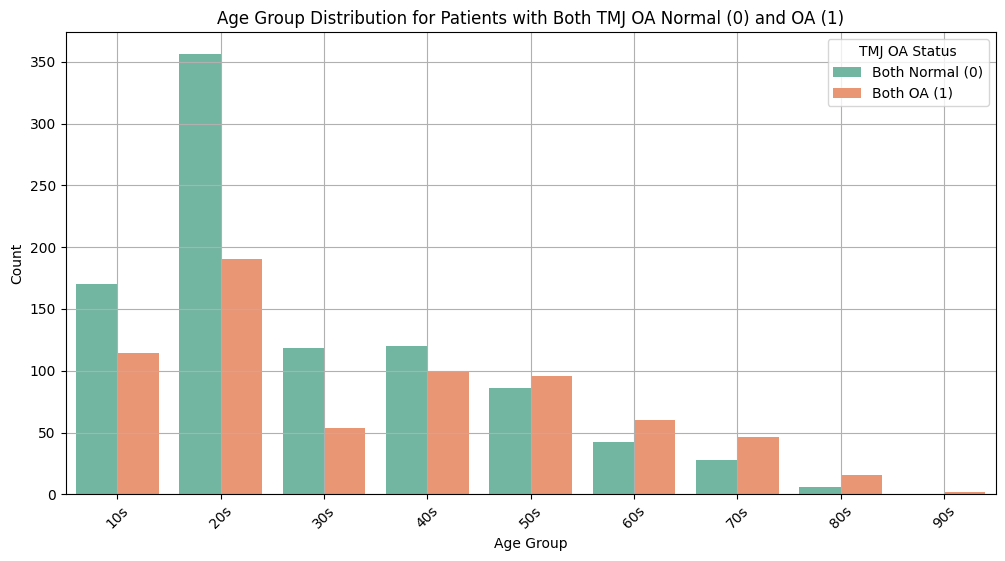

In [31]:
# Right와 Left가 모두 0 (정상)인 경우 필터링
both_normal = tmj_data.groupby('Patient ID').filter(
    lambda x: (x['TMJ_OA_Status'] == 0).all()
)
both_normal['Status'] = 'Both Normal (0)'

# Right와 Left가 모두 1 (OA)인 경우 필터링
both_oa = tmj_data.groupby('Patient ID').filter(
    lambda x: (x['TMJ_OA_Status'] == 1).all()
)
both_oa['Status'] = 'Both OA (1)'

# 두 경우를 합치기
tmj_combined = pd.concat([both_normal, both_oa])

# Status별 Age_Group 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Status', data=tmj_combined, palette='Set2', dodge=True)
plt.title('Age Group Distribution for Patients with Both TMJ OA Normal (0) and OA (1)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='TMJ OA Status')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

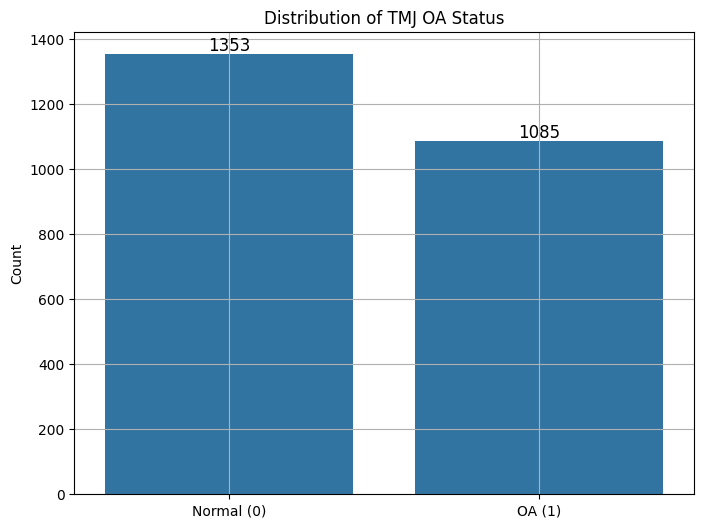

In [41]:
# 전체 TMJ OA 상태 분포 계산
total_tmj_counts = tmj_data['TMJ_OA_Status'].value_counts()

# TMJ OA 상태 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=total_tmj_counts.index, y=total_tmj_counts.values, palette=None)  # palette 제거
plt.title("Distribution of TMJ OA Status")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'OA (1)'])
plt.grid(True)

# 각 막대 위에 개수 표시
for i, count in enumerate(total_tmj_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

plt.show()

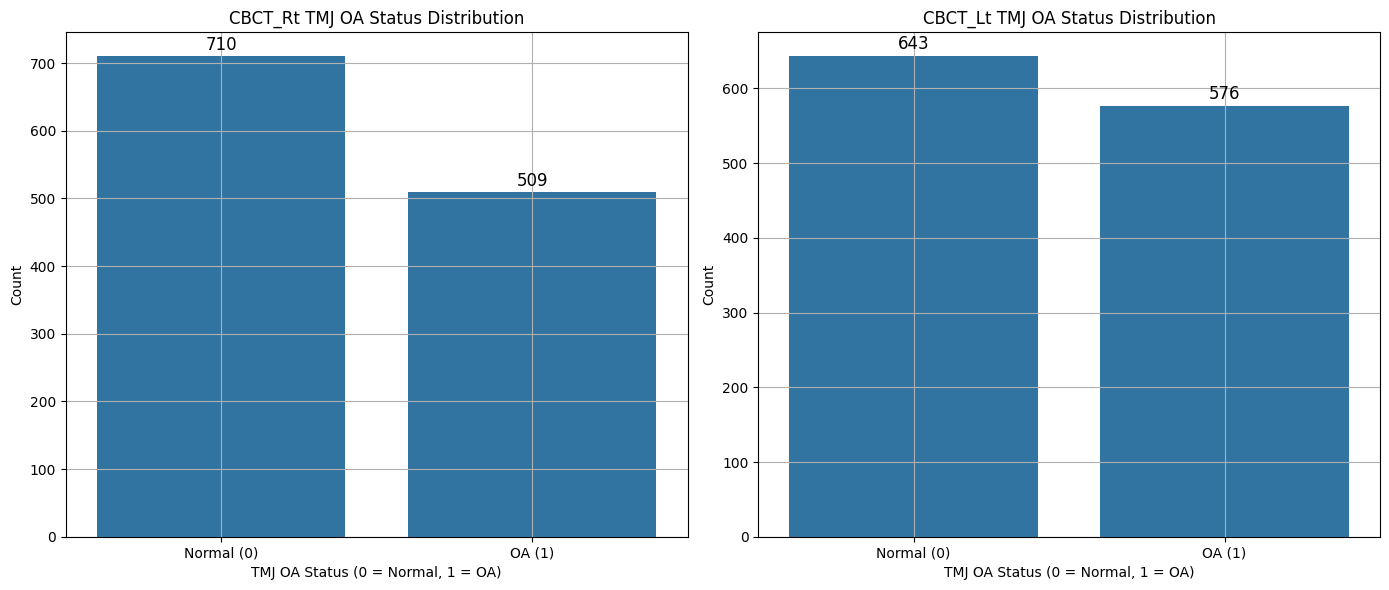

In [50]:
# 우측 TMJ와 좌측 TMJ 상태 분포 계산
right_tmj_counts = tmj_data[tmj_data['TMJ_Side'] == 'Right']['TMJ_OA_Status'].value_counts()
left_tmj_counts = tmj_data[tmj_data['TMJ_Side'] == 'Left']['TMJ_OA_Status'].value_counts()

# 시각화
plt.figure(figsize=(14, 6))

# 1. 우측 TMJ OA 상태 분포 시각화
plt.subplot(1, 2, 1)
sns.barplot(x=right_tmj_counts.index, y=right_tmj_counts.values, palette=None)  # palette 제거
plt.title("CBCT_Rt TMJ OA Status Distribution")
plt.xlabel("TMJ OA Status (0 = Normal, 1 = OA)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'OA (1)'])
plt.grid(True)

# 각 막대 위에 개수 표시
for i, count in enumerate(right_tmj_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

# 2. 좌측 TMJ OA 상태 분포 시각화
plt.subplot(1, 2, 2)
sns.barplot(x=left_tmj_counts.index, y=left_tmj_counts.values, palette=None)  # palette 제거
plt.title("CBCT_Lt TMJ OA Status Distribution")
plt.xlabel("TMJ OA Status (0 = Normal, 1 = OA)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'OA (1)'])
plt.grid(True)

# 각 막대 위에 개수 표시
for i, count in enumerate(left_tmj_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()